## 6-1. 프로젝트: Vocabulary Size를 변경해서 시도해보기
지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올리는 일에 힘썼습니다. 그런데 어쩌면 성능을 높이는 방법은 단순히 모델을 조정하는 일에 한정되지 않을 수 있습니다. 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줍니다. 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있겠죠.
</br>&nbsp;</br>
중요도가 낮은 단어들까지 포함해 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있고, 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있습니다. 이렇게 변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있습니다.
</br>&nbsp;</br>
단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트해 봅시다.

```shell
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
```

앞서 `num_words`로 사용할 단어의 수를 조정할 수 있다는 것을 배웠습니다. 빈도수가 많은 순서대로 나열했을 때, `num_words`의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 `<unk>`로 처리하는 원리였었죠.
</br>&nbsp;</br>
아래의 두 가지 경우에 대해서 지금까지 사용했던 모델들의 정확도를 직접 확인해 보세요.
</br>&nbsp;</br>

### 라이브러리 버전을 확인해 봅니다
---

In [3]:
import tensorflow
import matplotlib
import seaborn
import numpy
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.12.0
3.7.1
0.12.2
1.23.5
1.5.3
1.2.2


### 1. 모든 단어 사용
---

```shell
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
```

**사용할 라이브러리 import**

In [4]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


**훈련 데이터와 테스트 데이터 로드하기**

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

**데이터 구성 확인**

In [4]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


**원본 뉴스 데이터로 복원해보기**

---

로이터 뉴스 데이터
- `단어`를 `key`로, 고유한 `정수`를 `value`로 가지는 `dictionary`를 제공


In [6]:
# 뉴스 데이터를 word_index로 저장
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

550378/550378 [==============================] - 0s 0us/step
=3


**정수로부터 단어를 얻기**

---

정수 시퀀스로 되어 있는 데이터(`word_index`)를 텍스트 형태로 되돌려야 한다.</br>
&nbsp;</br>
*정수로부터 단어를 얻을 수 있는* `index_word` 생성

In [7]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


뉴스 데이터의 0, 1, 2번은 자연어에서 사용하는 특별한 토큰들을 위해 매핑한 번호다

---

`0 : <pad>`, `1: <sos>`, `2: <unk>`

---

따라서 모든 단어들은 `word_index`가 가진 키 값(숫자)에 **3을 더해주어야** 실제로 매핑된 단어의 인덱스 값이 나온다

In [8]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


**전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환**

In [9]:
# 전체 훈련용 뉴스 데이터 변환 (to text data)
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [10]:
# 전체 테스트용 뉴스 데이터 변환 (to text data)
x_test = decoded
print(len(x_test))

8982


각각 5개씩 출력 후, 변환 확인

In [11]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [12]:
x_test[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

---

**벡터화 하기**

In [5]:
## scikit-learn 모듈 임포트
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


`CountVectorizer()` 클래스를 사용하여 DTM을 생성하고, DTM의 크기를 확인

In [14]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


`TfidTransformer()` 클래스를 사용하여 TF-IDF Matrix를 생성하고, 크기를 확인

In [15]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


---

**나이브 베이즈 분류기**

In [6]:
# 사용할 머신러닝 모델의 라이브러리 임포트
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


`MultinomialNB()`를 통해서 나비 베이즈 분류기 사용  
사이킷런 기반 머신러닝 모델들은 `fit()`함수를 제공  
훈련 데이터와 훈련데이터에 대한 레이블은 args로 사용하면 모델이 이를 학습함

In [17]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

테스트 데이터에 대한 정확도 측정하기</br>
> 테스트 데이터를 TF-IDF 행렬로 변환해주기

이후 행렬과 `predict()`함수를 통해 예측값을 획득하여 정확도를 측정

In [29]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측

In [31]:
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

## 정확도를 구할 떄, y_test --> 2246, predicted --> 8892 와 같은 식으로
## 길이가 맞치 않아 에러가 발생

## 1안 y_test에 0을 넣어서 predict와 맞추고 정확도를 보자
def pad_y_test(y_test):
  y_test_pad = y_test
  y_test_pad = np.pad(y_test_pad, (0, len(predicted) - len(y_test_pad)), mode='constant', constant_values=0)

  print("정확도:", accuracy_score(y_test_pad, predicted))

## 2안 predict값을 y_test 길이에 맞춰 잘라버리고 정확도를 보자
def slicing_predict(predicted, y_test):
  predicted = predicted[:len(y_test)]

  print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [32]:
## 1안 실행
pad_y_test(y_test)

정확도: 0.06457359162769985


In [33]:
## 2안 실행
slicing_predict(predicted, y_test)

정확도: 0.25823686553873554


**나이브 베이즈 분류기의 예측 테스트**

In [34]:
# 임의의 샘플 - 네 번째 데이터 (인덱스 상으로는 3)
x_test[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely delinquent borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in fmha's financial eligibility standards indicated as many as one half of fmha borrowers who received new loans from the agency in 1986 would be ineligible under the proposed system the agency has proposed evaluating applicants' credit using a variety of financial ratios instead of relying solely on cashflow ability senate agriculture committee chairman patrick leahy d vt slammed the proposed eligibility changes telling fmha administrator vance clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmer

In [35]:
# 네 번째 데이터의 인덱스?
y_test[3]

4

모델이 제대로 예측하는지를 확인하기 위해 모델이 결정한 확률을 그래프로 시각화

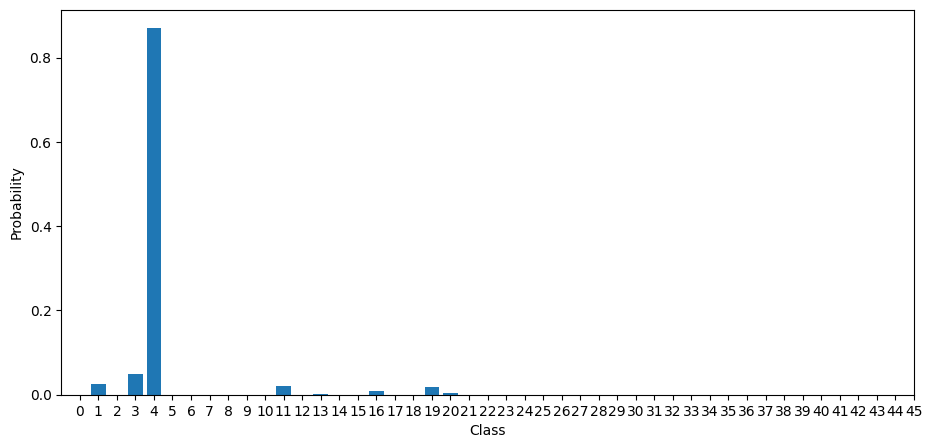

In [36]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

모델 예측값 (입력 데이터의 인덱스를 반환함)

In [37]:
model.predict(tfidfv_test[3])

array([4])

---

**F1-Score, Confusion Matrix**

In [7]:
# 필요한 라이브러리 import
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


사이킷런 `metrics` 패키지는 `classification_report()` 함수를 제공
> 정밀도, 재현율, F1 점수를 구해준다
>> 위 값들을 평균하여 전체 모델의 성능을 평가한다.

In [40]:
# print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))
print(classification_report(y_train, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.89      0.37      0.53       432
           2       0.00      0.00      0.00        74
           3       0.73      0.94      0.82      3159
           4       0.49      0.96      0.65      1949
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00       139
           9       0.00      0.00      0.00       101
          10       0.00      0.00      0.00       124
          11       0.91      0.42      0.58       390
          12       0.00      0.00      0.00        49
          13       0.00      0.00      0.00       172
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        20
          16       0.84      0.32      0.46       444
          17       0.00    

예제는 `y_test`로 평가를 하는데 input 개수가 일치하지 않아서 에러가 발생함</br>
&nbsp;</br>
`tfidfv_test` 길이 때문에 `y_train`을 가지고 평가를 해보면 약 63 퍼센트 (노드 기준은 `68%`)의 결과를 보여준다.</br>

---

최종 결과의 의미
</br>&nbsp;</br>
- `macro` : 단순평균
- `weighted` : 각 클래스에 속하는 표본의 개수로 가중평균
- `accuracy` : 정확도, 전체 학습 데이터의 개수에서 클래스로 정확하게 맞춘 개수의 비율

---

**Confusion Matrix**</br>
[Confusion Matrix video](https://youtu.be/M0GBAzFV9_A)</br>
[reference of confusion matrix](https://mjdeeplearning.tistory.com/31)

In [41]:
# 아래 함수를 통해서 confusion matrix를 시각화할 수 있다.
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


함수실행
> 이것도 동일하게 예제에서는 `y_test` 값을 넣는데 길이 불일치로 에러발생
>> y_train으로 np.array 길이 맞춰주어 확인해봄

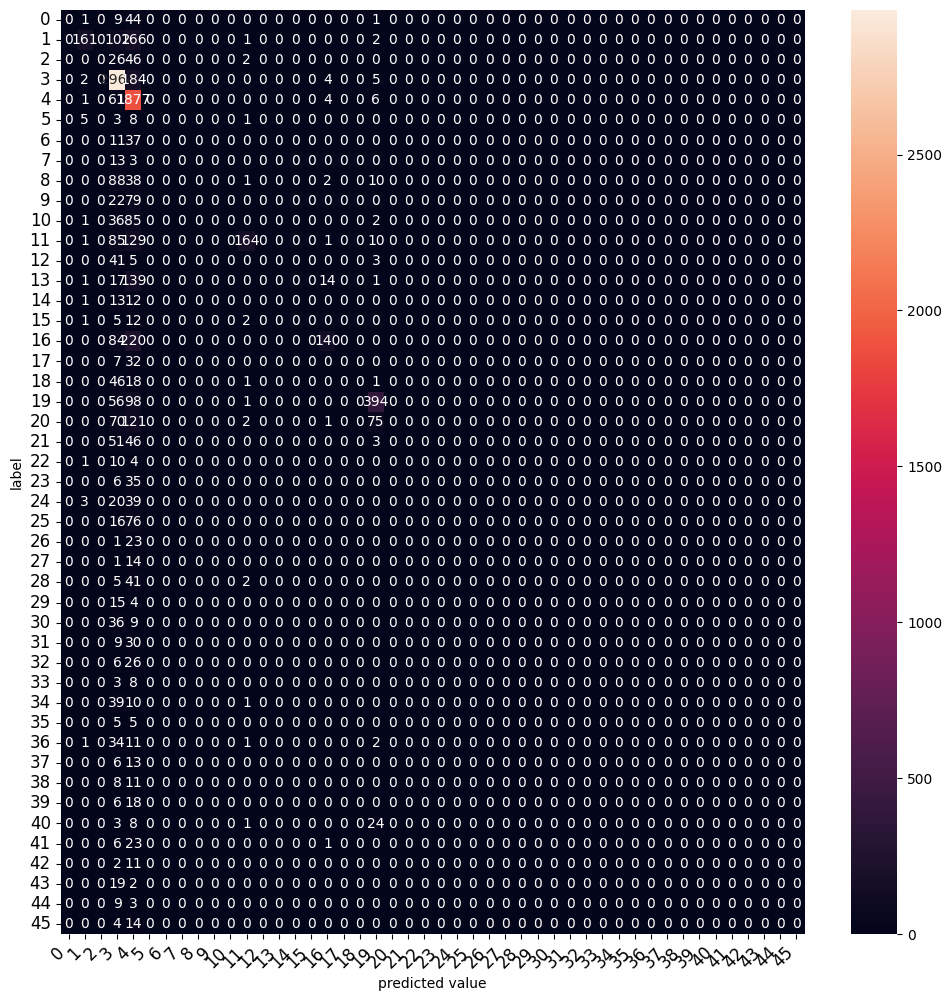

In [42]:
# graph_confusion_matrix(model, tfidfv_test, y_test)
graph_confusion_matrix(model, tfidfv_test, y_train)

---

**CNB (Complement Naive Bayes Classifier)**

---

데이터가 불균형한 경우 결정 경계의 가중치가 편향성을 가지는 문제점이 있을 수 있다. (나이브 베이지안 분류기 사용 시 문제와 동일)</br>
&nbsp;</br>
이러한 문제점을 보완한 것이 **컴플리먼트 나이브 베이즈 분류기(CNB)**다.
- 데이터 불균형을 고려하여 가중치를 부여하는 특성이 있음
  - 일반적으로 나이브 베이즈 분류기(`MultinomialNB`) 보다 성능이 좋음

In [43]:
# 모델 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [44]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("정확도:", accuracy_score(y_train, predicted)) #예측값과 실제값 비교

정확도: 0.8403473613894455


위 코드에서 주석처리한 부분이 제공된 예제</br>
길이 불일치로 에러 발생해서 `y_train`을 넣어 같은 길이로 정확도를 확인해봄

---

**로지스틱 회귀(Logistic Regression)**

---

로지스틱 회귀는 소프트맥스(softmax) 함수를 사용하여 다중 클래스 분류 알고리즘을 지원함
> **소프트맥스 회귀 (Softmax Regression)**라고도 한다

In [47]:
# LogisticRegression() 함수를 통해 소프트맥스 회귀를 구현
import time

# 10분 정도 소요됩니다.
start_time = time.time()
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
end_time = time.time()

print(f"소요시간: {end_time - start_time} sec")

소요시간: 505.63535618782043 sec


TMI : 노드에서 `686.956282377243` 정도의 소요시간을 확인함

In [49]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("정확도:", accuracy_score(y_train, predicted)) #예측값과 실제값 비교

정확도: 0.9683812068581608


위 코드도 예제는 `y_test`를 가지고 스코어를 측정하는데 길이 불일치 에러가 발생함</br>
길이가 맞는 `y_train`으로 확인해봄
> 노드는 `97%` 정도의 정확도를 보여줌

---

**선형 서포트 벡터 머신(Linear Support Vector Machine)**

---

[LSVM youtube](https://youtu.be/y4CYcpRiNsw)</br>

In [50]:
# LinearSVC()를 통해 LSVM 모델을 학습
start_time = time.time()
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
end_time = time.time()

print(f"소요시간: {end_time - start_time} sec")

소요시간: 91.12556099891663 sec


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [51]:
# Linear SVC 테스트 데이터에 대한 예측해보세요
#예측값과 실제값 비교해보세요
predicted = lsvc.predict(tfidfv_test) # 테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("정확도:", accuracy_score(y_train, predicted)) #예측값과 실제값 비교

정확도: 0.9683812068581608


---

**결정 트리 (Decision Tree)**

---

[Decision Tree video](https://youtu.be/n0p0120Gxqk)</br>
&nbsp;</br>
사이킷런은 `DecisionTreeClassifier()`를 통해 결정 트리를 구현함
- 결정 트리의 깊이는 `max_depth`를 통해 정해줄 수 있음

In [52]:
# 결정 트리 모델 훈련
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [53]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("정확도:", accuracy_score(y_train, predicted)) #예측값과 실제값 비교

정확도: 0.6806947227788911


---

**랜덤 포레스트 (Random Forest)**

---

*앙상블(Ensemble)*
- 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

[머신러닝 앙상블 - 랜덤포레스트 video](https://youtu.be/nZB37IBCiSA)</br>

> 결정 트리는 훈련 데이터에 overfitting 되는 경향 발생
>> 랜덤 포레스트는 앙상블을 통해 이러한 문제를 해결함
>>> ex) 서로 다른 방향으로 과적합된 트리들을 조합 시, 오히려 모델 전체에서는 과적합을 피한다는 논지

In [54]:
#estimator를 5로 설정하고 random_state를 0으로 설정한 RandomForestClassifier를 선언해주세요.
#참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

estimator = 5
random_state = 0

forest = RandomForestClassifier(n_estimators=estimator, random_state=random_state)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [55]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("정확도:", accuracy_score(y_train, predicted)) #예측값과 실제값 비교

정확도: 0.9423291026497439


---

**그래디언트 부스팅 트리(GradientBoostingClassifier)**

---

여러 개의 결정 트리를 묶어 만드는 앙상블 모델
- 랜덤 포레스트와 다르게 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦

In [56]:
# 15분 정도 소요될 수 있습니다.
start_time = time.time()
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
end_time = time.time()

print(f"소요시간: {end_time - start_time} sec")

소요시간: 995.3921790122986 sec


In [57]:
# 모델 평가
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("정확도:", accuracy_score(y_train, predicted)) #예측값과 실제값 비교

정확도: 0.9482297929191716


---

**보팅(Voting)**

---

앙상블 기법 중 하나
- [보팅 (하드보팅 + 소프트보팅) video](https://youtu.be/y4Wh0E1d4oE)
> 하드보팅: 결과물에 대한 최종값을 투표해서 결정
> 소프트보팅 : 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값 도출

In [58]:
# 20분 이상 소요될 수 있습니다.
# Voting을 구현해보세요. (Voing은 'soft'로 설정)
# 조건1 : 로지스틱회귀를 사용해주세요(패널티는 'L2'로 설정)
#조건 2: Complement Naive Bayes Classifier를 사용해주세요
#조건 3: GradientBoosting Classifier를 사용해주세요
# 참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier
from sklearn.linear_model import LogisticRegression
voting = 'soft'
## 조건 나열
cond_1 = LogisticRegression()   # 기본 패널티가 L2
cond_2 = ComplementNB()
cond_3 = GradientBoostingClassifier()
# estimator 내부 arg는 튜플 형태가 되어있지 않으면 에러 발생하더라
estimators = [('logstic_regression', cond_1), ('complient_nb', cond_2), ('gradient_boosting', cond_3)]


start_time = time.time()
# 모델 선언 및 훈련
voting_classifier = VotingClassifier(estimators=estimators, voting=voting)
voting_classifier.fit(tfidfv, y_train)
end_time = time.time()

print(f"소요시간: {end_time - start_time} sec")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


소요시간: 1085.619063615799 sec


In [59]:
# 정확도 확인
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("정확도:", accuracy_score(y_train, predicted)) #예측값과 실제값 비교

정확도: 0.9403250946337118


# 개인 회고

---

1. 해당 파트는 노드 예제를 그대로 수행하였음
2. 데이터 전처리에 문제가 있는 노드였다.
  ```python
  # 전체 훈련용 뉴스 데이터 변환 (to text data)
  decoded = []
  for i in range(len(x_train)):
      t = ' '.join([index_to_word[index] for index in x_train[i]])
      decoded.append(t)

  x_train = decoded
  print(len(x_train))
  ```
  ```python
  # 전체 테스트용 뉴스 데이터 변환 (to text data)
  x_test = decoded
  print(len(x_test))
  ```

  - 이 부분 그대로 사용해버리면 `x_test`의 길이가 `2246`이 나올수가 없다. (그래서 정확도 테스트가 저모양 ㅠ)

  - 2번 부터 제대로 수행할 수 있게 전처리 하였다.

  - 보팅에 대해서 좋은 접근법이다 싶었지만 CPU 연산이 콜라보되니까.. 느리다....

  - 위에서 언급된 머신러닝 기법만 써
  - 라고 했을때 시간 제한을 걸어버린다면 과연 쓸까 싶기도..

### 2. 빈도수 상위 5,000개의 단어만 사용
---

```shell
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
```

**단어 개수 조절하면서 사용할 수 있게 함수(`data_load_by_num_word()`)선언**

In [60]:
def data_load_by_num_word(num_words):
  # 모듈 임포트
  from tensorflow.keras.datasets import reuters
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np
  import pandas as pd

  # 데이터 로드 (train, test, num_words set-up case)
  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)

  return (x_train, y_train), (x_test, y_test)

In [65]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = data_load_by_num_word(5000)

In [66]:
# 데이터 구성 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [67]:
# 로이터 뉴스 데이터 세팅
# 뉴스 데이터를 word_index로 저장
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


In [68]:
# index_word 생성
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [78]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [79]:
# 전체 훈련용 뉴스 데이터 변환 (to text data)
decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [80]:
# 전체 테스트용 뉴스 데이터 변환 (to text data)
## 노드에는 이 부분이 제대로 처리되지 않으니 에러 났던거임
decoded = []
for i in range(len(x_test)):
  t = ' '.join([index_to_word[index] for index in x_test[i]])
  decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [82]:
# 각각 5개 출력
print(f"x_train\n {x_train[:5]}, x_test\n {x_test[:5]}")

x_train
 ['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the

**벡터화 하기**

In [83]:
## 모듈 임포트
## scikit-learn 모듈 임포트
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [84]:
# DTM 생성, DTM 크기 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [85]:
# TF-IDF 생성, TF-IDF 크기 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


### 3. 직접 단어 개수를 설정해서 사용
---

위 단계에서 5000으로 제시된 `num_words`를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.

> 사용할 모델  
<br>&nbsp;</br>
> 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

1) 나이브 베이즈 분류기

In [86]:
# 사용할 머신러닝 모델의 라이브러리 임포트
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


In [87]:
# 모델 훈련
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [88]:
# 테스트 데이터에 대한 정확도 측정
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


2) 로지스틱 회귀

In [89]:
# LogisticRegression() 함수를 통해 소프트맥스 회귀를 구현
import time

# 모델 훈련, 10분 정도 소요됩니다.
start_time = time.time()
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
end_time = time.time()

print(f"소요시간: {end_time - start_time} sec")

소요시간: 362.59530234336853 sec


In [90]:
# 테스트 데이터에 대한 정확도 평가
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8032056990204809


3) 보팅

In [91]:
# 조건 나열
con_1 = GradientBoostingClassifier(random_state=0)
con_2 = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
cond_3 = ComplementNB()
# estimator 내부 arg는 튜플 형태가 되어있지 않으면 에러 발생하더라
estimators = [('logstic_regression', cond_1), ('complient_nb', cond_2), ('gradient_boosting', cond_3)]

In [93]:
start_time = time.time()
# 모델 선언 및 훈련
voting_classifier = VotingClassifier(estimators=estimators, voting='soft')
voting_classifier.fit(tfidfv, y_train)
end_time = time.time()

print(f"소요시간: {end_time - start_time} sec")

소요시간: 20.42595100402832 sec


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
# 정확도 확인
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.798753339269813


In [95]:
# 정밀도, 재현율, F1 점수
# 나이브 case
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

In [96]:
# 정밀도, 재현율, F1 점수
# 보팅 case
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.65      0.84      0.73       105
           2       0.92      0.60      0.73        20
           3       0.93      0.93      0.93       813
           4       0.73      0.93      0.82       474
           5       0.00      0.00      0.00         5
           6       0.92      0.79      0.85        14
           7       1.00      0.33      0.50         3
           8       0.72      0.61      0.66        38
           9       0.92      0.92      0.92        25
          10       0.96      0.77      0.85        30
          11       0.64      0.82      0.72        83
          12       1.00      0.23      0.38        13
          13       0.67      0.65      0.66        37
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         9
          16       0.71      0.80      0.75        99
          17       1.00    

In [97]:
# 정밀도, 재현율, F1 점수
# 로지스틱 case
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.77      0.75       105
           2       0.76      0.80      0.78        20
           3       0.90      0.92      0.91       813
           4       0.80      0.86      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.66      0.71      0.68        38
           9       0.81      0.88      0.85        25
          10       0.89      0.83      0.86        30
          11       0.64      0.73      0.69        83
          12       0.57      0.31      0.40        13
          13       0.63      0.65      0.64        37
          14       0.50      0.50      0.50         2
          15       0.75      0.33      0.46         9
          16       0.70      0.75      0.73        99
          17       0.80    

# 개인 회고
1. 나이브 베이즈 분류기가 노드에서 `66%`였고, `num_words`를 5000으로 줄인 후 확인하니 `67%` 정도였다.
  - 노드 : `num_words` is `10,000`
  - 정확도 면에서 큰 차이가 없고, 확실히 다른 로직보다 정확도가 낮은게 눈에 띈다.
2. 노드 내용 그대로 따라할 시, `x_test`가 문제였는데 그 부분 제대로 캐치해서 `y_test`와 갯수 동일하게 맞춘게 속이 시원한 부분..
3. F1-Score
  - 나이브 : `67%`
  - 로지스틱 : `80%`
  - 보팅 : `80%`
  
  > 나이브의 경우 10000일 때, 68%, 5000일 때, 67%
    
  > 로지스틱의 경우 10000일 때, 80%, 5000일 때, 80%

  > 보팅의 경우 10000일 때, 96%긴 한데 `y_train`으로 체크해버린 이슈가 있고, 5000일 때, 80%가 확인되었다.
  >> 케글 예제(https://www.kaggle.com/code/shanekonaung/reuters-dataset-using-keras) 보니 딥러닝이긴 하지만 약 80% 정도 효율 보여주는거 보면.. 큰 차이 없지 않을까 생각함

### 4. 딥러닝 모델과 비교해 보기
---

위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

LSTM으로 수행해보기</br>
[참고링크](https://wikidocs.net/22933)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [114]:
# 직전에 테스트한 3번과 동일하게 상위 5000개
vocab_size = 5000
# max 길이는 링크 예제와 동일하게
max_len = 100

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)


X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [100]:
# Callback은 쓰지않고 예제와 동일하게 LSTM을 구성 후 훈련
embedding_dim = 128
hidden_units = 128
num_classes = 46

# 이전 나이브 모델과 구분하려고 이름을 model_lstm로 설정
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim))
model_lstm.add(LSTM(hidden_units))
model_lstm.add(Dense(num_classes, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model_lstm.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - 29s 379ms/step - loss: 2.6323 - acc: 0.3412 - val_loss: 2.3891 - val_acc: 0.3620
Epoch 2/30
71/71 [==============================] - 25s 357ms/step - loss: 2.1208 - acc: 0.4621 - val_loss: 1.9929 - val_acc: 0.5098
Epoch 3/30
71/71 [==============================] - 20s 285ms/step - loss: 1.8818 - acc: 0.5210 - val_loss: 1.7637 - val_acc: 0.5614
Epoch 4/30
71/71 [==============================] - 25s 357ms/step - loss: 1.6852 - acc: 0.5700 - val_loss: 1.7256 - val_acc: 0.5597
Epoch 5/30
71/71 [==============================] - 23s 329ms/step - loss: 1.6568 - acc: 0.5783 - val_loss: 1.7488 - val_acc: 0.5481
Epoch 6/30
71/71 [==============================] - 21s 295ms/step - loss: 1.5892 - acc: 0.5993 - val_loss: 1.6748 - val_acc: 0.5810
Epoch 7/30
71/71 [==============================] - 24s 344ms/step - loss: 1.4987 - acc: 0.6309 - val_loss: 1.7300 - val_acc: 0.5775
Epoch 8/30
71/71 [==============================] - 26s 366ms/step - 

In [102]:
# 모델 평가
results = model_lstm.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

18/18 [==============================] - 3s 143ms/step - loss: 1.7130 - acc: 0.6937
test loss, test acc: [1.7130132913589478, 0.6936776638031006]


In [115]:
# 직전에 테스트한 3번과 동일하게 상위 5000개
vocab_size = 5000
# max 길이는 2배 늘려보자
max_len = 200

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)


X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [116]:
# Callback은 쓰지않고 예제와 동일하게 LSTM을 구성 후 훈련
embedding_dim = 128
hidden_units = 128
num_classes = 46

# 이전 나이브 모델과 구분하려고 이름을 model_lstm로 설정
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim))
model_lstm.add(LSTM(hidden_units))
model_lstm.add(Dense(num_classes, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model_lstm.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
71/71 [==============================] - 47s 640ms/step - loss: 2.6128 - acc: 0.3385 - val_loss: 2.3762 - val_acc: 0.3620
Epoch 2/10
71/71 [==============================] - 41s 574ms/step - loss: 2.0914 - acc: 0.4625 - val_loss: 1.8491 - val_acc: 0.5325
Epoch 3/10
71/71 [==============================] - 48s 682ms/step - loss: 1.7431 - acc: 0.5440 - val_loss: 1.7171 - val_acc: 0.5677
Epoch 4/10
71/71 [==============================] - 39s 545ms/step - loss: 1.6795 - acc: 0.5600 - val_loss: 1.6694 - val_acc: 0.5708
Epoch 5/10
71/71 [==============================] - 41s 584ms/step - loss: 1.5433 - acc: 0.6008 - val_loss: 1.5988 - val_acc: 0.5913
Epoch 6/10
71/71 [==============================] - 38s 541ms/step - loss: 1.4426 - acc: 0.6335 - val_loss: 1.5262 - val_acc: 0.6175
Epoch 7/10
71/71 [==============================] - 38s 533ms/step - loss: 1.2958 - acc: 0.6708 - val_loss: 1.4367 - val_acc: 0.6447
Epoch 8/10
71/71 [==============================] - 39s 548ms/step - 

In [117]:
# 모델 평가
results = model_lstm.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

18/18 [==============================] - 4s 235ms/step - loss: 1.3837 - acc: 0.6661
test loss, test acc: [1.38368558883667, 0.6660730242729187]


# 개인회고
1. 기본 예제만 따라해서 그런가 `70%` 정도의 LSTM 결과가 나왔다.
  - 리뷰 길이 100 제한, 30회 훈련
  
2. LSTM 예제를 수정하여 테스트하였고, `67%` 정도의 LSTM 결과가 나왔다.
  - 리뷰 길이 200 제한, 10회 훈련

훈련량을 줄였는데 `3%` 정도 차이가 있는걸로 봐서는 데이터 구성이 획기적으로 변하지 않는 이상 임팩트는 나오지 않을것으로 보인다.</br>

추가 고려사항
- 데이터 전처리르 노드와 완전히 동일하게 했나..라고 하면 아니라서 조금 더 개선을 해보아야 할것 같다.

---

5. 추가 머신러닝 테스트

상위 15000개로 머신러닝 하는 케이스 추가해보자

In [8]:
import time
# 데이터 로드, 상위 15000개
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [9]:
# 데이터 구성 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [10]:
# 뉴스 데이터를 word_index로 저장
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

550378/550378 [==============================] - 0s 0us/step
=3


In [11]:
# 정수 -> 단어 획득
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [12]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [13]:
# 전체 훈련용 뉴스 데이터 변환 (to text data)
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [14]:
# 전체 테스트용 뉴스 데이터 변환 (to text data)
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [15]:
## 각각 5개 출력
print(f"{x_train[:5]} \n{x_test[:5]}")

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one

In [16]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 14227)


In [17]:
# TF-IDF 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 14227)


In [18]:
# 모델 선언
## 1. 나이브 베이즈
model = MultinomialNB()
## 2. CNB
cb = ComplementNB()
## 3. 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
## 4. LSVM
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
## 5. 랜덤 포레스트
estimator = 5
random_state = 0
forest = RandomForestClassifier(n_estimators=estimator, random_state=random_state)
## 6. 그래디언트 부스팅 트리
# 15분 정도 소요될 수 있습니다.
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
## 7. 보팅
voting = 'soft'
### 조건 나열
cond_1 = lr
cond_2 = cb
cond_3 = grbt
### estimator 내부 arg는 튜플 형태가 되어있지 않으면 에러 발생하더라
estimators = [('logstic_regression', cond_1), ('complient_nb', cond_2), ('gradient_boosting', cond_3)]
voting_classifier = VotingClassifier(estimators=estimators, voting=voting)

In [19]:
# 모델들 훈련 -1
start_time = time.time()
model.fit(tfidfv, y_train)
cb.fit(tfidfv, y_train)
end_time = time.time()
print(f"나이브 베이즈 소요시간: {end_time - start_time} sec")

start_time = time.time()
lr.fit(tfidfv, y_train)
end_time = time.time()
print(f"로지스틱 회귀 소요시간: {end_time - start_time} sec")

start_time = time.time()
lsvc.fit(tfidfv, y_train)
end_time = time.time()
print(f"LSVM 소요시간: {end_time - start_time} sec")

start_time = time.time()
forest.fit(tfidfv, y_train)
end_time = time.time()
print(f"랜덤 포레스트 소요시간: {end_time - start_time} sec")

나이브 베이즈 소요시간: 0.4033544063568115 sec
로지스틱 회귀 소요시간: 650.6728043556213 sec


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LSVM 소요시간: 128.07160925865173 sec
랜덤 포레스트 소요시간: 2.58732271194458 sec


In [20]:
# 모델들 훈련 -2
start_time = time.time()
grbt.fit(tfidfv, y_train)
end_time = time.time()
print(f"그래디언트 부스팅 트리 소요시간: {end_time - start_time} sec")

## 그래디언트 부스팅 모델 까지는 잘 수행되었고 나머지 부분을 아래 셀로 옮기면서 중단시켜서 에러가 발생한것임

그래디언트 부스팅 트리 소요시간: 1379.0959498882294 sec


KeyboardInterrupt: ignored

In [21]:
# 모델들 훈련 -3
start_time = time.time()
voting_classifier.fit(tfidfv, y_train)
end_time = time.time()
print(f"보팅 소요시간: {end_time - start_time} sec")

보팅 소요시간: 2084.3486931324005 sec


In [22]:
# 테스트 데이터에 대한 정확도 측정
## 테스트 데이터 TF-IDF로 변환
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [23]:
## 1. 나이브 베이즈 정확도
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
## 2. CNB 정확도
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
## 3. 로지스틱 회귀 정확도
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
## 4. LSVM 정확도
predicted = lsvc.predict(tfidfv_test) # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
## 5. 렌덤 포레스트 정확도
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
## 6. 그래디언트 부스팅 정확도
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
## 7. 보팅 정확도
# 정확도 확인
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6331255565449688
정확도: 0.7720391807658059
정확도: 0.8147818343722173
정확도: 0.7907390917186109
정확도: 0.6714158504007124
정확도: 0.7707034728406055
정확도: 0.8143365983971504


In [30]:
## 1. 나이브 베이즈 F1-score
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.77      0.53      0.63       105
           2       0.00      0.00      0.00        20
           3       0.77      0.91      0.84       813
           4       0.47      0.96      0.63       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.69      0.40      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.41      0.53        99
          17       0.00    

In [31]:
## 2. CNB F1-score
print(classification_report(y_test, cb.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.65      0.90      0.76       105
           2       0.91      0.50      0.65        20
           3       0.90      0.90      0.90       813
           4       0.76      0.93      0.84       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.71      0.61        83
          12       0.00      0.00      0.00        13
          13       0.60      0.57      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.68      0.79      0.73        99
          17       0.00    

In [32]:
## 3. 로지스틱 회귀 F1-score
print(classification_report(y_test, lr.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.79      0.76       105
           2       0.78      0.70      0.74        20
           3       0.92      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.85      0.88      0.86        25
          10       0.93      0.87      0.90        30
          11       0.68      0.72      0.70        83
          12       0.62      0.38      0.48        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.70      0.77      0.73        99
          17       0.82    

In [33]:
## 4. LSVM F1-score
print(classification_report(y_test, lsvc.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.75      0.76      0.75       105
           2       0.75      0.75      0.75        20
           3       0.91      0.91      0.91       813
           4       0.80      0.85      0.83       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.33      0.50         3
           8       0.68      0.68      0.68        38
           9       0.81      0.84      0.82        25
          10       0.96      0.80      0.87        30
          11       0.65      0.76      0.70        83
          12       0.44      0.31      0.36        13
          13       0.57      0.54      0.56        37
          14       1.00      1.00      1.00         2
          15       0.62      0.56      0.59         9
          16       0.62      0.74      0.67        99
          17       0.83    

In [34]:
## 5. 랜덤 포레스트 F1-score
print(classification_report(y_test, forest.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33        12
           1       0.42      0.69      0.52       105
           2       0.13      0.10      0.11        20
           3       0.81      0.90      0.85       813
           4       0.65      0.85      0.74       474
           5       0.00      0.00      0.00         5
           6       0.83      0.36      0.50        14
           7       0.50      0.67      0.57         3
           8       0.62      0.53      0.57        38
           9       0.71      0.40      0.51        25
          10       0.60      0.20      0.30        30
          11       0.45      0.51      0.47        83
          12       0.60      0.23      0.33        13
          13       0.40      0.22      0.28        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.55      0.46      0.50        99
          17       0.00    

In [35]:
## 6. 그래디언트 부스팅 F1-score
print(classification_report(y_test, grbt.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.79      0.70      0.74       105
           2       0.62      0.65      0.63        20
           3       0.88      0.91      0.89       813
           4       0.78      0.84      0.81       474
           5       0.00      0.00      0.00         5
           6       0.83      0.71      0.77        14
           7       1.00      0.67      0.80         3
           8       0.59      0.63      0.61        38
           9       0.86      0.76      0.81        25
          10       0.86      0.80      0.83        30
          11       0.64      0.67      0.66        83
          12       0.35      0.54      0.42        13
          13       0.54      0.41      0.46        37
          14       0.08      0.50      0.13         2
          15       0.38      0.33      0.35         9
          16       0.72      0.74      0.73        99
          17       0.56    

In [36]:
## 7. 보팅 F1-score
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.77      0.75      0.76       105
           2       0.75      0.75      0.75        20
           3       0.92      0.94      0.93       813
           4       0.82      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.65      0.68      0.67        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.68      0.72      0.70        83
          12       0.43      0.46      0.44        13
          13       0.69      0.65      0.67        37
          14       0.10      0.50      0.17         2
          15       0.57      0.44      0.50         9
          16       0.73      0.77      0.75        99
          17       0.73    

# 개인 회고
1. (`TMI` google코랩 쓸거면 셀 분할 잘하자..)
 - 무턱대고 모델들 훈련 단일 셀에서 돌리다가 터져버리고 새로 돌리는 경험하니 <s>눈물이 광광</s>

2. 다른 분들(`효겸님`, `철웅님`) 코드에서도 경험했지만 데이터셋의 한계로 `num_words` 값 설정 변경이 크게 영향을 주지 않았다.
  - (5000, 10000, 15000 의 경우 기준)
3. `num_words`가 `5,000`인 경우가 테스트 기준에선 가장 유의미하다고 볼 수 있을 것 같다.

4. `5,000`개의 경우 전체 모델에 대해서 테스트 하지 않았는데, 추후 필요하다면 별개의 파일로 구현해서 보관해두는게 참고하기에 좋을 것 같다.

---

`num_words` is `5,000`</br>
1. 나이브 정확도 : 67%
2. 로지스틱 정확도 : 80%
3. 보팅 정확도 : 80%

`num_words` is `15,000`</br>
1. 나이브 정확도 : 63%
2. CNB 정확도 : 77%
3. 로지스틱 정확도 : 81%
4. LSVM 정확도 : 79%
5. 랜덤 정확도 포레스트 : 67%
6. 그래디언트 부스팅 정확도 : 77%
7. 보팅 정확도 : 81%